In [164]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

In [165]:
wines = pd.read_csv("Data\wines.csv")
wines.drop(columns=["Unnamed: 0"],inplace=True)
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,6.0,0.200,0.32,3.0,0.031,26.0,118.0,0.99134,3.38,0.68,11.2,7,white,medium
1,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,5,red,low
2,6.3,0.270,0.18,7.7,0.048,45.0,186.0,0.99620,3.23,0.47,9.0,5,white,low
3,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,white,low
4,7.7,0.270,0.34,1.8,0.028,26.0,168.0,0.99110,2.99,0.48,12.1,7,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,8.3,0.280,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,red,medium
6493,8.6,0.360,0.26,11.1,0.030,43.5,171.0,0.99480,3.03,0.49,12.0,5,white,low
6494,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5,red,low
6495,7.7,0.320,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,white,medium


In [166]:
# Import DF with prices
prices = pd.read_csv("Data\wine_sales_data.csv")
prices.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [167]:
prices.drop(columns="Unnamed: 0", inplace=True)

In [168]:
# apply a lambda function to assing the quality label to the different prices
prices['quality_label'] = prices['points'].apply(lambda value: 'low' if value <= 85 else 'medium' if value <= 90 else 'high')

In [169]:
prices.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,quality_label
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,high
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,high
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,high
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,high
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,high


In [170]:
# I'll keep just data of portuguese wines -> country==Portugal
# prices["country"] == "Portugal" will produce a list of boolean
# DF[list of boolean] will produce a new DF with only True data 
pp = prices[prices["country"] =="Portugal"]
pp

,country,description,designation,points,price,province,region_1,region_2,variety,winery,quality_label
64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim,high
74,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba,high
91,Portugal,"The local Baga grape, better known for produci...",Marquês de Marialva Rosé Bruto,86,12.0,Beira Atlantico,NaN,NaN,Baga,Adega de Cantanhede,medium
94,Portugal,This family-owned estate has produced an immed...,Muros de Vinha,86,10.0,Douro,NaN,NaN,Portuguese Red,Quinta do Portal,medium
110,Portugal,This state-owned estate of forests and vineyar...,Companhia das Lezírias Herdade de Catapereiro ...,86,12.0,Tejo,NaN,NaN,Portuguese Red,Wines & Winemakers,medium
...,...,...,...,...,...,...,...,...,...,...,...
149624,Portugal,"An easy, fresh, ripe style, with dried fruits ...",Presidential 20-year old tawny,84,50.0,Port,NaN,NaN,Port,C. da Silva,low
149631,Portugal,"This is a very old 40-year old, with some hars...",40-year old tawny,84,130.0,Port,NaN,NaN,Port,Poças,low
149636,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia,low
150784,Portugal,"A powerful, solid wine, packed with luscious f...",Quinta de Vargellas,90,42.0,Portugal,NaN,NaN,Port,Taylor Fladgate,medium


In [171]:
pp.drop(columns=["region_1", "region_2","winery","designation", "description"], inplace=True)

In [172]:
# How many results do I have for Vinho verde in DF?
pp.loc[pp.province== "Vinho Verde","province"].count

<bound method Series.count of 277       Vinho Verde
993       Vinho Verde
994       Vinho Verde
1378      Vinho Verde
1558      Vinho Verde
             ...     
141129    Vinho Verde
141143    Vinho Verde
141148    Vinho Verde
143472    Vinho Verde
143575    Vinho Verde
Name: province, Length: 396, dtype: object>

In [173]:
# keeping just Vinho verde
ppv = pp[pp["province"]== "Vinho Verde"]
ppv= ppv.reset_index(drop=True)
ppv

,country,points,price,province,variety,quality_label
0,Portugal,92,35.0,Vinho Verde,Alvarinho,high
1,Portugal,85,10.0,Vinho Verde,Portuguese White,low
2,Portugal,85,9.0,Vinho Verde,Portuguese White,low
3,Portugal,91,NaN,Vinho Verde,Loureiro,high
4,Portugal,84,10.0,Vinho Verde,Rosé,low
...,...,...,...,...,...,...
391,Portugal,83,9.0,Vinho Verde,Portuguese White,low
392,Portugal,82,8.0,Vinho Verde,Portuguese White,low
393,Portugal,82,6.0,Vinho Verde,Portuguese White,low
394,Portugal,86,9.0,Vinho Verde,White Blend,medium


In [174]:
ppv["quality_label"].value_counts()

medium    199
low       182
high       15
Name: quality_label, dtype: int64

In [175]:
# null value check
ppv.isnull().sum()

country           0
points            0
price            86
province          0
variety           0
quality_label     0
dtype: int64

In [176]:
# dropping null values

ppv.dropna(subset=["price"],inplace=True)

In [177]:
ppv["quality_label"].value_counts()

medium    159
low       141
high       10
Name: quality_label, dtype: int64

In [178]:
v = ppv["variety"].value_counts()
v

Portuguese White    195
Alvarinho            37
Loureiro             31
Rosé                 31
Portuguese Red        7
Avesso                3
Vinhão                2
Portuguese Rosé       1
Azal                  1
Arinto                1
White Blend           1
Name: variety, dtype: int64

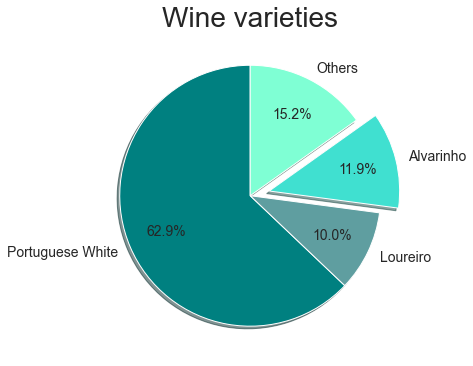

In [179]:
# most reviewed grape variety . Focus on Alvarinho as highest price variety on the market

pie, ax = plt.subplots(figsize=[10,6]);
labels = ["Portuguese White", "Loureiro","Alvarinho","Others"];
sizes= [195,31,37,47];
explode = (0, 0, 0.15 ,0);
colors=["teal", "cadetblue", "turquoise", "aquamarine"];
var_plot= plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.7, shadow=True,startangle=90, colors=colors,textprops={'fontsize': 14});

plt.title("Wine varieties", fontsize=28);
pie.savefig("Wine varieties.png", dpi=80);

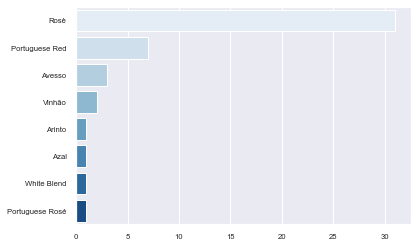

In [180]:
# visualization of other grapes grown in the region

others_label=["Rosè","Portuguese Red", "Avesso","Vinhão","Arinto","Azal","White Blend","Portuguese Rosé"]
others= [31,7,3,2,1,1,1,1]
barplot= sns.barplot(x=others,y=others_label, palette= "Blues")
sns.set_context("paper", font_scale=0.7) 
plt.savefig("Other grapes varieties in Vinho Verde.png", dpi=80)

In [181]:
# variety and points. what is the best wine for the experts?

# group by and mean
ppv.groupby(["variety"]).mean()

,points,price
variety,,
Alvarinho,88.972973,18.135135
Arinto,87.000000,13.000000
Avesso,88.666667,14.666667
Azal,87.000000,13.000000
Loureiro,87.258065,12.677419
Portuguese Red,83.571429,8.857143
Portuguese Rosé,83.000000,8.000000
Portuguese White,86.179487,10.153846
Rosé,83.870968,9.580645


In [182]:
ppv.groupby(["variety"]).describe()

points                                                       \
                  count       mean       std   min    25%   50%    75%   max   
variety                                                                        
Alvarinho          37.0  88.972973  1.723796  85.0  88.00  89.0  90.00  92.0   
Arinto              1.0  87.000000       NaN  87.0  87.00  87.0  87.00  87.0   
Avesso              3.0  88.666667  0.577350  88.0  88.50  89.0  89.00  89.0   
Azal                1.0  87.000000       NaN  87.0  87.00  87.0  87.00  87.0   
Loureiro           31.0  87.258065  2.190399  84.0  86.00  87.0  89.50  92.0   
Portuguese Red      7.0  83.571429  2.070197  82.0  82.50  83.0  83.50  88.0   
Portuguese Rosé     1.0  83.000000       NaN  83.0  83.00  83.0  83.00  83.0   
Portuguese White  195.0  86.179487  2.322812  80.0  84.50  86.0  88.00  91.0   
Rosé               31.0  83.870968  1.454692  80.0  83.00  84.0  85.00  86.0   
Vinhão              2.0  86.500000  2.121320  85.0  85.75  86.5  87.25  88.0   
White Blend         1.0  86.000000       NaN  86.0  86.00  86.0  86.00  86.0   

                  price                                                     
                  count       mean       std   min   25%   50%   75%   max  
variety                                                                     
Alvarinho          37.0  18.135135  6.940870  11.0  13.0  16.0  21.0  45.0  
Arinto              1.0  13.000000       NaN  13.0  13.0  13.0  13.0  13.0  
Avesso              3.0  14.666667  1.527525  13.0  14.0  15.0  15.5  16.0  
Azal                1.0  13.000000       NaN  13.0  13.0  13.0  13.0  13.0  
Loureiro           31.0  12.677419  4.643182   6.0   9.0  12.0  15.0  25.0  
Portuguese Red      7.0   8.857143  4.375255   5.0   5.0  10.0  10.0  17.0  
Portuguese Rosé     1.0   8.000000       NaN   8.0   8.0   8.0   8.0   8.0  
Portuguese White  195.0  10.153846  3.215126   5.0   8.0   9.0  12.0  21.0  
Rosé               31.0   9.580645  2.486955   5.0   8.0  10.0  12.0  14.0  
Vinhão              2.0  22.000000  5.656854  18.0  20.0  22.0  24.0  26.0  
White Blend         1.0   9.000000       NaN   9.0   9.0   9.0   9.0   9.0

In [183]:
exp = pd.DataFrame({'variety': ['Alvarinho', 'Loureiro','Portuguese White'],'points': [89.14, 84, 86.16], "price":[18.14, 12.67,10.15]})


In [184]:
exp

,variety,points,price
0,Alvarinho,89.14,18.14
1,Loureiro,84.00,12.67
2,Portuguese White,86.16,10.15


In [185]:
# Price of top three wines produces in Vinho verde region

# plt.figure(figsize=(10, 8))
# palette = ["teal", "cadetblue", "turquoise"]
# splot= sns.barplot(x="variety",y="price",data=exp, palette= palette, orient="v")
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = "center", va = "center", xytext = (0, 9), textcoords = 'offset points',weight='bold')
# plt.xlabel("Grape variety", size=14)
# plt.ylabel("Average selling price per bottle", size=14)
#plt.savefig("Price of top three grapes produced in Vinho verde region.png"dpi=80)

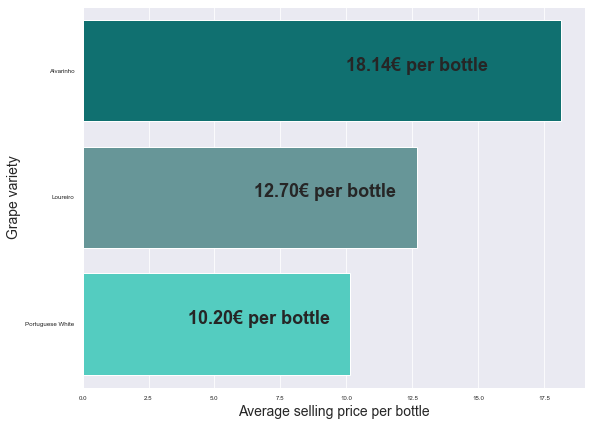

In [186]:
# Price of top three grapes grown in Vinho verde region

fig1, ax1 = plt.subplots(figsize=(9,7))
#plt.figure(figsize=(10, 8))
palette = ["teal", "cadetblue", "turquoise"]
sns.set_theme(style="whitegrid")
splot= sns.barplot(x="price",y="variety",data=exp, palette= palette,orient = 'h')

ax1.annotate("18.14€ per bottle", xy=(10, 0),weight='bold',size=18)
ax1.annotate("12.70€ per bottle", xy=(6.5, 1),weight='bold',size=18)
ax1.annotate("10.20€ per bottle", xy=(4, 2),weight='bold',size=18)

sns.set(font_scale=.7)
plt.xlabel("Average selling price per bottle", size=14)
plt.ylabel("Grape variety", size=14)
plt.savefig("Price of top three grapes produced in Vinho verde region.png",dpi=80)

In [187]:
# plt.figure(figsize=(10, 8))
# palette = ["teal", "cadetblue", "turquoise"]
# splot= sns.barplot(x="variety",y="points",data=exp, palette= palette, orient="v")
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = "center", va = "center", xytext = (0, 9), textcoords = 'offset points',weight='bold')
# plt.xlabel("Grape variety", size=14)
# plt.ylabel("Expert rating", size=14)
#plt.savefig("Expert rating on top 3 grapes variety.png", dpi=80)

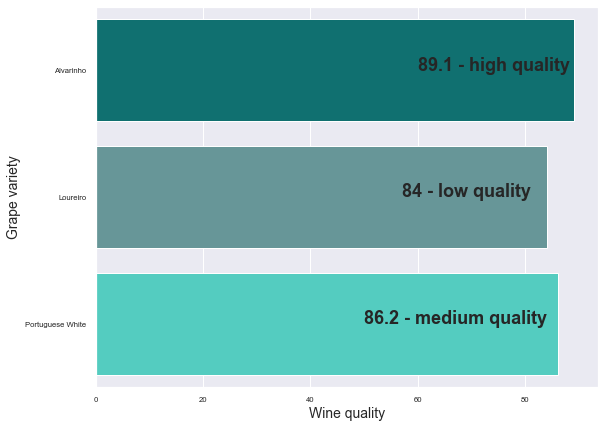

In [188]:
fig1, ax1 = plt.subplots(figsize=(9,7))

palette = ["teal", "cadetblue", "turquoise"]
sns.set_theme(style="whitegrid")
splot= sns.barplot(x="points",y="variety",data=exp, palette= palette,orient = 'h')
ax1.annotate("89.1 - high quality", xy=(60, 0),weight='bold',size=18)
ax1.annotate("84 - low quality", xy=(57, 1),weight='bold',size=18)
ax1.annotate("86.2 - medium quality", xy=(50, 2),weight='bold',size=18)

sns.set(font_scale=.7)
plt.xlabel("Wine quality", size=14)
plt.ylabel("Grape variety", size=14)
plt.savefig("Rating given by experts.png",dpi=80)

In [189]:
# importing new dataset on export of wines in liter from portugal
explit = pd.read_excel(r"Data\Export in Liter.xls")
explit

,Country,2015,2016,2017,2018,2019 (*)
0,GERMANY,4869971,6155369,5786445,5864266,5432397
1,USA,5141587,5295455,5108687,5131106,5431710
2,FRANCE,2702465,3053469,2627574,2895165,2740492
3,BRAZIL,1417323,1387377,2182560,2685712,2943161
4,CANADA,1322496,1469785,1317909,1502472,1488982
5,UNITED KINGDOM,931942,1236359,1503905,1656559,1731827
6,SWITZERLAND,977981,878299,866453,869050,783990
7,ANGOLA,746880,423733,310003,414806,280105
8,POLAND,647605,838262,990641,838328,1162462
9,BELGIUM,718721,584910,331626,303184,294003


In [190]:
explit.drop([6,7,8,9,10,11,12,13,14,15,16],inplace=True)

In [191]:
# importing new dataset on export of wines in euro from portugal

expeur = pd.read_excel(r"Data\export in €.xlsx")
expeur

,Country,2015,2016,2017,2018,2019 (*)
0,GERMANY,9642146,12056586,11425028,11364766,10567389
1,USA,13058063,13698439,13438993,13325779,14594536
2,FRANCE,6107589,6844638,6014622,6588814,6350418
3,BRAZIL,3092760,2982196,4689413,5930768,6530014
4,CANADA,3775849,4149824,3939954,4456259,4579590
5,UNITED KINGDOM,1948265,2754031,3176247,3586297,3770203
6,SWITZERLAND,2412312,2211048,2255651,2207133,2118601
7,ANGOLA,1833114,1046488,887726,1091712,755416
8,POLAND,1407162,1688490,2041096,1721586,2451012
9,BELGIUM,1721549,1392549,856353,805123,827437


In [192]:
# Dividing all values by 1000000 and rounding result with first 2 decimals

d = expeur.iloc[:, 1:].div(1000000).round(2)
d.index = expeur["Country"]

d

,2015,2016,2017,2018,2019 (*)
Country,,,,,
GERMANY,9.64,12.06,11.43,11.36,10.57
USA,13.06,13.70,13.44,13.33,14.59
FRANCE,6.11,6.84,6.01,6.59,6.35
BRAZIL,3.09,2.98,4.69,5.93,6.53
CANADA,3.78,4.15,3.94,4.46,4.58
UNITED KINGDOM,1.95,2.75,3.18,3.59,3.77
SWITZERLAND,2.41,2.21,2.26,2.21,2.12
ANGOLA,1.83,1.05,0.89,1.09,0.76
POLAND,1.41,1.69,2.04,1.72,2.45


In [193]:
# invert columns with rows and keep just first 4 rows
d = d.T.iloc[:,:4]
d

Country,GERMANY,USA,FRANCE,BRAZIL
2015,9.64,13.06,6.11,3.09
2016,12.06,13.70,6.84,2.98
2017,11.43,13.44,6.01,4.69
2018,11.36,13.33,6.59,5.93
2019 (*),10.57,14.59,6.35,6.53


In [194]:
lst = list(d["GERMANY"].values)
lst.append(list(d["USA"].values))
lst.append(list(d["FRANCE"].values))

lst.append(list(d["BRAZIL"].values))
lst = [i for b in map(lambda x:[x] if not isinstance(x, list) else x, lst) for i in b]

In [195]:
df1 = pd.DataFrame(list(zip(y,c, lst)),columns =['Export per year', 'country', "Million €"]) 
df1

,Export per year,country,Million €
0,2015,GERMANY,9.64
1,2016,GERMANY,12.06
2,2017,GERMANY,11.43
3,2018,GERMANY,11.36
4,2019 (*),GERMANY,10.57
5,2015,USA,13.06
6,2016,USA,13.70
7,2017,USA,13.44
8,2018,USA,13.33
9,2019 (*),USA,14.59


In [196]:
df1['Export per year'] = df1['Export per year'].replace(['2019 (*)'],2019)
df1

,Export per year,country,Million €
0,2015,GERMANY,9.64
1,2016,GERMANY,12.06
2,2017,GERMANY,11.43
3,2018,GERMANY,11.36
4,2019,GERMANY,10.57
5,2015,USA,13.06
6,2016,USA,13.70
7,2017,USA,13.44
8,2018,USA,13.33
9,2019,USA,14.59


In [197]:
df1.sort_values('Export per year')

,Export per year,country,Million €
0,2015,GERMANY,9.64
5,2015,USA,13.06
10,2015,FRANCE,6.11
15,2015,BRAZIL,3.09
1,2016,GERMANY,12.06
6,2016,USA,13.70
11,2016,FRANCE,6.84
16,2016,BRAZIL,2.98
2,2017,GERMANY,11.43
17,2017,BRAZIL,4.69


In [198]:
df1.dtypes

Export per year      int64
country             object
Million €          float64
dtype: object

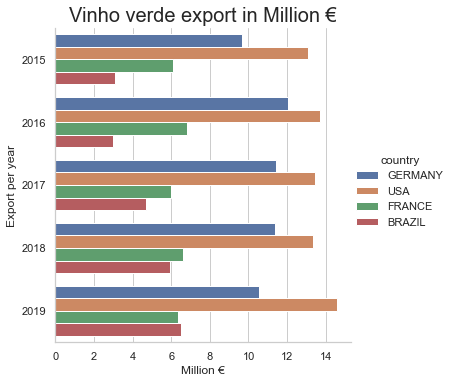

In [199]:
sns.set_theme(style="whitegrid")
pplot=sns.catplot(hue="country",y="Export per year", data=df1, x="Million €",ax = ax, kind='bar', orient="h")
plt.title("Vinho verde export in Million €", size=20)
plt.savefig("Vinho verde exp.png", dpi=80)